*Import the needed tensorflow and python libraries needed for data modification*


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install tensorflow==1.14.0rc1

#!pip install keras==2.2.4
import tensorflow as tf

import cv2
import os
import glob
import csv
import math
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
import keras
import errno
import sys
import urllib.request
from urllib.request import urlretrieve
from csv import reader
import os.path
from PIL import Image
import requests
from io import BytesIO
from skimage import io


Using TensorFlow backend.


*Import the Google Drive Authorization needed to access the data folders*

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Move into My Drive, where my image folders are stored*

In [3]:
cd '/content/gdrive/My Drive/'

/content/gdrive/My Drive


In [0]:


# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime
!rm -rf ./logs/ 


*Create the paths to the directories of the images, which are stored in their own folders in My Drive*

In [0]:
deer_train_path= '/content/gdrive/My Drive/Independent_Study/deer'
notDeer_train_path = '/content/gdrive/My Drive/Independent_Study/not_Deer'


@param: path_in - *The path to the folder of images*
@param: arrayName *An array to store the images*

Every file (or image) in the folder is read in RGB format, as BGR is the default for openCV

The image is the resized to (224,224), which is the height and width ised by most pre-trained models

The image is then appended to an array

The if statement is included because one of the images in the not deer training folder, at index 465, was not working and this bypassed that image 

@return: ArrayName *The same images now populated with image data*

In [0]:
def imageAdder(path_in, arrayName):
   
    path = path_in
    i=0
    for image_path in os.listdir(path):
      
        input_path = os.path.join(path, image_path)
        image = cv2.imread(input_path)
        image2 =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = (image/127.5) - 1
        img = cv2.resize(image2,(224,224)) #crop rather than resize -keeps aspect ratio
        arrayName.append(img)
        print(image_path)
        i = i+1
    return arrayName

*Instantiating the arrays that will hold the training and testing images for deer and not deer*

In [0]:
deer_train = []
nDeer_train =[]


*Populating the previously instantiated arrays with image data from the folders*"

In [8]:
deer_train = imageAdder(deer_train_path, deer_train)

nDeer_train = imageAdder(notDeer_train_path, nDeer_train)

Deer_Train900.jpg
Deer_Train901.jpg
Deer_Train902.jpg
Deer_Train903.jpg
Deer_Train904.jpg
Deer_Train905.jpg
Deer_Train906.jpg
Deer_Train907.jpg
Deer_Train908.jpg
Deer_Train909.jpg
Deer_Train910.jpg
Deer_Train911.jpg
Deer_Train912.jpg
Deer_Train913.jpg
Deer_Train914.jpg
Deer_Train915.jpg
Deer_Train916.jpg
Deer_Train917.jpg
Deer_Train918.jpg
Deer_Train919.jpg
Deer_Train920.jpg
Deer_Train921.jpg
Deer_Train922.jpg
Deer_Train923.jpg
Deer_Train924.jpg
Deer_Train925.jpg
Deer_Train926.jpg
Deer_Train927.jpg
Deer_Train928.jpg
Deer_Train929.jpg
Deer_Train930.jpg
Deer_Train931.jpg
Deer_Train932.jpg
Deer_Train933.jpg
Deer_Train934.jpg
Deer_Train935.jpg
Deer_Train936.jpg
Deer_Train937.jpg
Deer_Train938.jpg
Deer_Train939.jpg
Deer_Train940.jpg
Deer_Train941.jpg
Deer_Train942.jpg
Deer_Train943.jpg
Deer_Train944.jpg
Deer_Train945.jpg
Deer_Train946.jpg
Deer_Train947.jpg
Deer_Train948.jpg
Deer_Train949.jpg
Deer_Train950.jpg
Deer_Train951.jpg
Deer_Train952.jpg
Deer_Train953.jpg
Deer_Train954.jpg
Deer_Train

*Converting the arrays from lists to NumPy arrays, which allows for multi-dimensionality and is how the data will be fed into the model*

In [0]:
deer_train = np.asarray(deer_train)
nDeer_train =np.asarray(nDeer_train)

*Seeing the shape of the arrays holding the data*

(1900, 224, 224, 3)
(1899, 224, 224, 3)


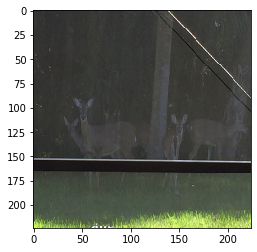

In [10]:
print(deer_train.shape) 
print(nDeer_train.shape)
plt.imshow(deer_train[578])

*Creating the label arrays for the images. Assigning 1 to indicate a deer and 0 to indicate a not deer. Using np.ones or np.zeros created a numpy array of 1's or 0's, which have their length determined by the length of the corresponding image arrays. The prints after the assignments are used to test whether the labels were generated correctly.*

In [11]:
trainLabelsDeer = np.ones(len(deer_train))
print(len(trainLabelsDeer))

trainLabelsNotDeer = np.zeros(len(nDeer_train))
print(len(trainLabelsNotDeer))


1900
1899


*This adds the training labels together and the testing labels together in one array. The arrays are in order, so the first half are deer images and the second half are not deer images.*

In [0]:
x_total = np.concatenate((deer_train,nDeer_train))
y_total = np.concatenate((trainLabelsDeer, trainLabelsNotDeer))
y_total = keras.utils.np_utils.to_categorical(y_total)
y_total = y_total.astype(int)

*Printing the length of the training images, testing images, training labels and testing labels arrays to make sure the addition was successful*

In [13]:
print(len(x_total))
y_total = y_total.astype(int)
print(y_total)


3799
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


*Printing the shape to make sure the images were all standardized (224x224x3) and that the number of samples is the number added as well*

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x_total, y_total,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3039, 224, 224, 3)
(3039, 2)
(760, 224, 224, 3)
(760, 2)


* **Commented Out**
* *Turning the labels into categories rather than just numbers. Use when using binary or categorical cross-entropy, not sparse categorical cross-entropy*
* However, I found that it is more accurate with sparse categorical cross-entropy

In [0]:
#y_train = keras.utils.np_utils.to_categorical(y_train)
#y_test = keras.utils.np_utils.to_categorical(y_test)
#y_train = y_train.astype(int)
#y_test = y_test.astype(int)

*Normalizing the images around a mean offset of 0 to put them into the model*

In [0]:
x_train = (x_train/127.5)-1
x_test = (x_test/127.5) -1

*Printing the training labels to make sure they have not been changed by the one hot encoding vectorization.*

In [17]:
print (y_train[:10])

[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]]


*Checking the shape of the data. In this case, the labels increased a dimension from 1 to 2 because we have split the labels into two discrete categories, rather than just 0's and 1's*

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3039, 224, 224, 3)
(760, 224, 224, 3)
(3039, 2)
(760, 2)


*Importing the libararies needed to create the CNN architecture*

In [0]:
import keras
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import save_model
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D

In [20]:
"""def myNet():
    model = tf.keras.Sequential()
    #model.add(Lambda(lambda x: x-0.5,input_shape = IMAGE_SHAPE))
    
    model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
    #model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.50))

    model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
    #model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.50))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    return model
    
model = myNet()
"""

"def myNet():\n    model = tf.keras.Sequential()\n    #model.add(Lambda(lambda x: x-0.5,input_shape = IMAGE_SHAPE))\n    \n    model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))\n    #model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))\n    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))\n    model.add(tf.keras.layers.Dropout(0.50))\n\n    model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu'))\n    #model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))\n    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))\n    model.add(tf.keras.layers.Dropout(0.50))\n\n    model.add(tf.keras.layers.Flatten())\n    model.add(tf.keras.layers.Dense(128, activation='relu'))\n    model.add(tf.keras.layers.Dense(2, activation='softmax'))\n\n    return model\n    \nmodel = myNet()\n"

*Specifiying how many classes there are, setting the basis of our model as MobileNetV2 (which is trained on imageNet, does not have the last classifcation layer, and with images of size 224x224x3). This allows our model to be based of an already trained ML model. A sequential model is created, with ResNet50 as the base. A flatten() is added so the images are in the right dimension for the softmax function. This last layer allows us to "predict" what class the image is labelled as based on the probability of the softmax function*

In [21]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2, activation = "softmax")
    
model = tf.keras.Sequential([
  base_model
])

model.add(global_average_layer)
model.add(prediction_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Compile the model


In [0]:
base_learning_rate = 0.01 #0.003 , 0.001. 0.0003
model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

*Printing the model to see what the model actually looks like*

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


*Training the model with 10 epochs at 32 images per batch. This means that the model will run through all the data 10 times in segments of 32 images at a time, with x_train being the training set and y_test being the validation set.*

In [24]:
initial_epochs = 50
batch_for_training = 32

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks_list = tensorboard_callback
history_one = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
      epochs=initial_epochs, batch_size=batch_for_training)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3039 samples, validate on 760 samples
Epoch 1/50
3039/3039 [==============================] - 16s 5ms/sample - loss: 0.6680 - acc: 0.6259 - val_loss: 0.5178 - val_acc: 0.7447
Epoch 2/50
3039/3039 [==============================] - 12s 4ms/sample - loss: 0.5556 - acc: 0.7154 - val_loss: 0.4585 - val_acc: 0.7711
Epoch 3/50
3039/3039 [==============================] - 13s 4ms/sample - loss: 0.5090 - acc: 0.7493 - val_loss: 0.4195 - val_acc: 0.7934
Epoch 4/50
3039/3039 [==============================] - 12s 4ms/sample - loss: 0.4787 - acc: 0.7664 - val_loss: 0.4065 - val_acc: 0.7882
Epoch 5/50
3039/3039 [==============================] - 13s 4ms/sample - loss: 0.4586 - acc: 0.7953 - val_loss: 0.3876 - val_acc: 0.8013
Epoch 6/50
3039/3039 [==============================] - 

In [25]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 599), started 0:15:41 ago. (Use '!kill 599' to kill it.)

*Showing a graph of the training loss and the validation loss on a loss vs epoch graph*

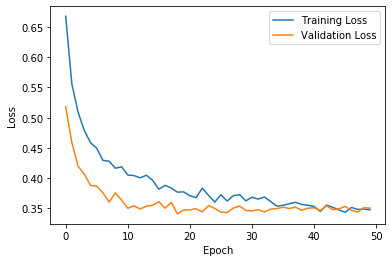

In [34]:
loss_loss = history_one.history['loss']
val_loss = history_one.history['val_loss']
plt.plot(loss_loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'],loc='upper right')
plt.show()

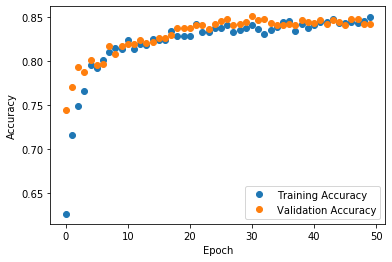

In [38]:
loss_acc = history_one.history['acc']
val_acc = history_one.history['val_acc']
plt.plot(loss_acc, 'o')
plt.plot(val_acc, 'o')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='best')
plt.show()

*Saving the model then coverting the Tensorflow Model just trained into a Tensorflow Lite Model. This allows the model to be run on mobile devices.*

In [27]:
keras_file = '/content/gdrive/My Drive/deer_model_new.h5'
tf.keras.models.save_model(model, keras_file)

# Convert to TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("/content/gdrive/My Drive/converted_model_nonMobileNet.tflite", "wb").write(tflite_model)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 262 variables.
INFO:tensorflow:Converted 262 variables to const ops.


8862764


*   Add learning rate decay -> slows down learning rate over time going over epochs (not too big of a deal bc Adam optimizer already does this)
*   Image amplification -> twists/rotate image for more training data,definitely look into soon to amplify amount of data
*   Generator - from Chimpface, yield, function as an active list -> depends on how much RAM we have... genertor uses virtual arrays in batches to loop through large data sets. Probably more of a longer term solution when we have big data sets.
*   Add learning rate decay -> slows down learning rate over time going voer epochs (not too big of a deal bc Adam optimizer already does this)
*   Wild me data boxing -> currently using Labelbox, keep going
*  Semantic segmentation architectures if boxing-facial recognitionrecognizing a face in an image -> waaayyyyy long term; rather than boxing an image, it outlines the image to count things (ask Chad to show the 'weird luke skywalker fire hydrant' video)


